<a href="https://colab.research.google.com/github/SuryaAndika3005/DIF62130_A_25_3005_SURYA-ANDIKA/blob/main/Praktikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum Machine Learning 2**


---


Surya Andika

2311533005

Step 1:
,

*   import library
*   memuat dataset yang akan digunakan yang dimana dataset ini telah diupload ke dalam github dan dataset ini dipanggil dari github dalam bentuk raw
* menampilkan dataset

In [ ]:
import pandas as pd

# load dataset
dataset_url = 'https://raw.githubusercontent.com/SuryaAndika3005/DIF62130_A_25_3005_SURYA-ANDIKA/refs/heads/main/Praktikum2/diabetes.csv'
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Selective Features



*   Memisahkan fitur dan target pada dataset
*   Fitur : Pregnancies, Glucose, BloodPressure, Insulin, BMI, DiabetesPedigreeFunction, dan Age
*   Variabel target : outcome



In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

* Bentuk (shape) dari fitur dan target diperiksa dengan menggunakan (X.shape) dan (Y.Shape)

In [ ]:
print(X.shape)
print(y.shape)

(768, 7)
(768,)


Splitting Data

* Membagi dataset menjadi dua bagian, yaitu training set dan testing set, dengan rasio 70:30 (70% untuk pelatihan dan 30% untuk pengujian).

In [ ]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Model Development and Prediction

* Mengimpor dan Membuat model dari LogisticRegression
* Melakukan pengujian dengan data training
* Memprediksi data testing

In [ ]:
#import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluating using Confusion Matrix

* Mengevaluasi performa model menggunakan Confusion Matrix

(Confusion Matrix digunakan untuk memahami kesalahan model dalam klasifikasi)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[143,  14],
       [ 35,  39]])

* Lalu, memvisualisaikan hasil dari evaluasi yang sudah dilakukan menggunakan Confusion Matrix dengan heatmap
* Mengetahui seberapa baik model ini membedakan kelas

Text(0.5, 427.9555555555555, 'Predicted label')

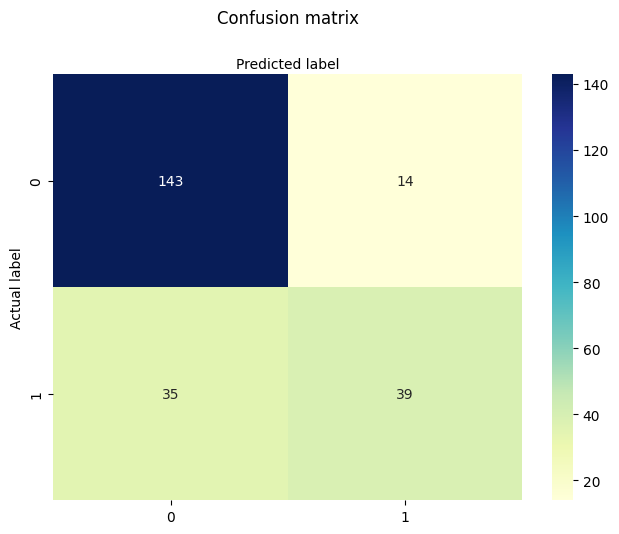

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion matric evaluation

* Mengevaluasi performa model klasifikasi dengan classification report
* Membandingkan model atau melakukan penyesuaian untuk meningkatkan akurasi

In [ ]:
# Confusion matric evaluation

from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))


                  precision    recall  f1-score   support

without diabetes       0.80      0.91      0.85       157
   with diabetes       0.74      0.53      0.61        74

        accuracy                           0.79       231
       macro avg       0.77      0.72      0.73       231
    weighted avg       0.78      0.79      0.78       231



ROC Curve

* Memvisualisasikan ROC Curve dan Menghitung AUC untuk mengevaluasi performa model klasifikasi
* ROC Curve membantu untuk memahami trade-off antara sensitivitas dan spesifisitas model
* AUC Score memberikan gambaran numerik tentang seberapa baik model dapat membedakan kelas (Jika mendekati 1 model sangat baik, jika 0,5 model kurang baik dan mungkin perlu diperbaiki)

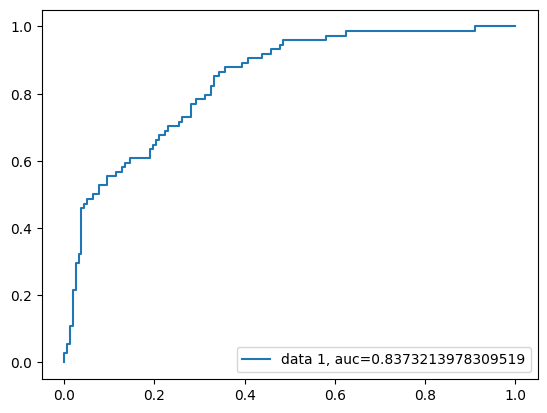

In [ ]:
# ROC Curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


Area Under Curve(AUC)

In [ ]:
# Area Under Curve(AUC)

print(f"AUC: {auc}")

AUC: 0.8373213978309519
